
# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction
### Notebook 4: Model Training Glove

Authors: Muhammed K. Ç., Karsanth P., Andrea V.


In [ ]:
#!pip install transformers[torch]
from pathlib import Path
from google.colab import drive
import pandas as pd


# Glove
### Karsanth P.

In [ ]:
file_path = Path("/clt_dataset.csv")

In [ ]:
df_x = pd.read_csv(file_path, sep='\t')

In [ ]:
df = df_x.copy()
df

,title,content,domain,token_title,token_words_content,token_domain,token_sents_content
0,qatar to slash emissions as lng expansion adva...,qatar petroleum qp is targeting aggressive cu...,energyintel,"['qatar', 'slash', 'emissions', 'lng', 'expans...","['qatar', 'petroleum', ' ', 'qp', 'targeting',...",['energyintel'],['qatar petroleum qp is targeting aggressive ...
1,india launches its first mw phwr,nuclear power corp of india ltd npcil synchro...,energyintel,"['india', 'launches', ' ', 'mw', 'phwr']","['nuclear', 'power', 'corp', 'india', 'ltd', '...",['energyintel'],['nuclear power corp of india ltd npcil synch...
2,new chapter for uschina energy trade,new us president joe biden took office this we...,energyintel,"['new', 'chapter', 'uschina', 'energy', 'trade']","['new', 'president', 'joe', 'biden', 'took', '...",['energyintel'],['new us president joe biden took office this ...
3,japan slow restarts cast doubt on energy plan,the slow pace of japanese reactor restarts con...,energyintel,"['japan', 'slow', 'restarts', 'cast', 'doubt',...","['slow', 'pace', 'japanese', 'reactor', 'resta...",['energyintel'],['the slow pace of japanese reactor restarts c...
4,nyc pension funds to divest fossil fuel shares,two of new york citys largest pension funds sa...,energyintel,"['nyc', 'pension', 'funds', 'divest', 'fossil'...","['new', 'york', 'citys', 'largest', 'pension',...",['energyintel'],['two of new york citys largest pension funds ...
...,...,...,...,...,...,...,...
9602,strata clean energy nets million in funding ...,strata clean energy has closed a million rev...,solarindustrymag,"['strata', 'clean', 'energy', 'nets', ' ', 'm...","['strata', 'clean', 'energy', 'closed', ' ', ...",['solarindustrymag'],['strata clean energy has closed a million r...
9603,orsted deploying sparkcognition renewable suit...,global renewable energy developer rsted is dep...,solarindustrymag,"['orsted', 'deploying', 'sparkcognition', 'ren...","['global', 'renewable', 'energy', 'developer',...",['solarindustrymag'],['global renewable energy developer rsted is d...
9604,veolia has plans for mw of solar in arkansas,veolia north america a provider of environment...,solarindustrymag,"['veolia', 'plans', ' ', 'mw', 'solar', 'arkan...","['veolia', 'north', 'america', 'provider', 'en...",['solarindustrymag'],['veolia north america a provider of environme...
9605,sunedison too big too fast,once the selfproclaimed leading renewable pow...,solarindustrymag,"['sunedison', 'big', 'fast']","['selfproclaimed', ' ', 'leading', 'renewable'...",['solarindustrymag'],['once the selfproclaimed leading renewable p...


## Word embedding

In [ ]:
# Assuming df is your DataFrame
#unique_words = set()
#df['token_words_content'].apply(lambda tokens: unique_words.update(tokens))

# Convert set to list if needed
#unique_words = list(unique_words)

from ast import literal_eval

# Ensure the tokens are in list format
df['token_words_content'] = df['token_words_content'].apply(literal_eval)

# Extract unique words
unique_words = set()
df['token_words_content'].apply(lambda tokens: unique_words.update(tokens))
unique_words = list(unique_words)



In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.decomposition import TruncatedSVD

def create_cooccurrence_matrix(tokenized_corpus, window_size, vocab):
    vocab_size = len(vocab)
    word_to_id = {word: i for i, word in enumerate(vocab)}

    # Initialize co-occurrence matrix
    cooccurrence_matrix = sparse.lil_matrix((vocab_size, vocab_size), dtype=np.float64)

    # Build the co-occurrence matrix
    for tokens in tokenized_corpus:
        for i, word in enumerate(tokens):
            if word in word_to_id:
                word_id = word_to_id[word]
                for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
                    if i != j and tokens[j] in word_to_id:
                        context_word_id = word_to_id[tokens[j]]
                        cooccurrence_matrix[word_id, context_word_id] += 1.0
    return cooccurrence_matrix

# Example usage

tokenized_corpus = df['token_words_content'].tolist()  # Assuming this is your tokenized corpus
vocab = list(set(word for tokens in tokenized_corpus for word in tokens))  # Create a vocabulary

# Create co-occurrence matrix
cooccurrence_matrix = create_cooccurrence_matrix(tokenized_corpus, window_size=5, vocab=vocab)

# Apply matrix factorization (using Truncated SVD for simplicity)
#svd = TruncatedSVD(n_components=100)  # 100-dimensional word vectors
#word_vectors = svd.fit_transform(cooccurrence_matrix)


In [ ]:
import numpy as np
from scipy import sparse

def train_glove(cooccurrence_matrix, vector_size, iterations, learning_rate, x_max, alpha):
    # Vector-Initalisation
    vocab_size = cooccurrence_matrix.shape[0]
    W = np.random.randn(vocab_size, vector_size) * 0.01
    W_context = np.random.randn(vocab_size, vector_size) * 0.01
    b = np.zeros(vocab_size)
    b_context = np.zeros(vocab_size)

    # Weightfunction
    def weight_fn(cooccurrence, x_max, alpha):
        return min(1.0, (cooccurrence / x_max) ** alpha)

    # Loop-Training
    for iter in range(iterations):
        for i, j in zip(*cooccurrence_matrix.nonzero()):
            cooccurrence = cooccurrence_matrix[i, j]
            weight = weight_fn(cooccurrence, x_max, alpha)
            common_term = weight * (np.dot(W[i], W_context[j]) + b[i] + b_context[j] - np.log(cooccurrence))
            W_grad = common_term * W_context[j]
            W_context_grad = common_term * W[i]

            # Parameter aktualisieren
            W[i] -= learning_rate * W_grad
            W_context[j] -= learning_rate * W_context_grad
            b[i] -= learning_rate * common_term
            b_context[j] -= learning_rate * common_term

    return W, W_context

# Training of the modell
vector_size = 100  # Dimensionality of vectors
iterations = 1  # Number of epochs
learning_rate = 0.05  # Learning rate
x_max = 100  # Parameter dor weight function
alpha = 0.75  # Parameter for weight function


W, W_context = train_glove(cooccurrence_matrix, vector_size, iterations, learning_rate, x_max, alpha)



### Cosine Similarity

In [ ]:
from numpy.linalg import norm

def cosine_similarity(vec_a, vec_b):
    """Calculates the cosine similarity between two vectors."""
    return np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))


In [ ]:
def word_similarity(word1, word2, word_vectors, word_to_id):
   """Calculates the cosine similarity between the vectors of two words."""

    if word1 in word_to_id and word2 in word_to_id:
        vec_word1 = word_vectors[word_to_id[word1]]
        vec_word2 = word_vectors[word_to_id[word2]]
        return cosine_similarity(vec_word1, vec_word2)
    else:
        return "One or both words not in vocabulary."

# Beispiel: Ähnlichkeit zwischen "President" und "Minister"
similarity = word_similarity('president', 'minister', W, word_to_id)
print(f"Die Similarity between 'president' und 'minister' is: {similarity}")


Die Ähnlichkeit zwischen 'president' und 'minister' ist: 0.8058692361106362


### Testing - Word analogy

In [ ]:
def find_closest_word(vec, word_vectors, word_to_id):
    """Findet das Wort, dessen Vektor am nächsten zum gegebenen Vektor liegt."""
    min_distance = float('inf')
    closest_word = None

    for word, index in word_to_id.items():
        distance = np.linalg.norm(vec - word_vectors[index])
        if distance < min_distance:
            min_distance = distance
            closest_word = word

    return closest_word

def solve_analogy(word_a, word_b, word_c, word_vectors, word_to_id):
    """Löst eine Wortanalogie der Form: word_a ist zu word_b, wie word_c zu ...?"""
    # Prüfen, ob die Wörter im Vokabular sind
    if word_a in word_to_id and word_b in word_to_id and word_c in word_to_id:
        vec_a = word_vectors[word_to_id[word_a]]
        vec_b = word_vectors[word_to_id[word_b]]
        vec_c = word_vectors[word_to_id[word_c]]

        # Vektor-Operation durchführen
        target_vec = vec_b - vec_a + vec_c

        # Das nächstgelegene Wort zu diesem Vektor finden
        closest_word = find_closest_word(target_vec, word_vectors, word_to_id)
        return closest_word
    else:
        return "Eines oder mehrere Wörter nicht im Vokabular."

# Beispiel: Lösen der Analogie "man" zu "king" wie "woman" zu ...
result = solve_analogy('man', 'king', 'woman', W, word_to_id)
print(f"Man ist zu King, wie Woman zu: {result}")


Man ist zu King, wie Woman zu: woman


wrong input....test is not good enough

In [ ]:
def solve_analogy(word_a, word_b, word_c, W, W_context, word_to_id):
    """Löst eine Wortanalogie der Form: word_a ist zu word_b, wie word_c zu ...?"""
    # Prüfen, ob die Wörter im Vokabular sind
    if word_a in word_to_id and word_b in word_to_id and word_c in word_to_id:
        # Durchschnitt der Haupt- und Kontextvektoren für jedes Wort berechnen
        vec_a = (W[word_to_id[word_a]] + W_context[word_to_id[word_a]]) / 2
        vec_b = (W[word_to_id[word_b]] + W_context[word_to_id[word_b]]) / 2
        vec_c = (W[word_to_id[word_c]] + W_context[word_to_id[word_c]]) / 2

        # Vektor-Operation durchführen
        target_vec = vec_b - vec_a + vec_c

        # Das nächstgelegene Wort zu diesem Vektor finden
        closest_word = find_closest_word(target_vec, (W + W_context) / 2, word_to_id)
        return closest_word
    else:
        return "Eines oder mehrere Wörter nicht im Vokabular."

# Beispiel
result = solve_analogy('man', 'king', 'woman', W, W_context, word_to_id)
print(f"Man ist zu King, wie Woman zu: {result}")


Man ist zu King, wie Woman zu: woman


In the above code, the solve_analogy function calculates the average of the main and context vectors for each of the words in the analogy. The find_closest_word function is then called with these average vectors to find the word that is closest to the target vector. However, the output is still incorrect.

## Sentence Embedding


In [ ]:
# Averaging word vectors
word_vectors = (W + W_context) / 2


In [ ]:
# Calculation of the sentence embeddings
def sentence_embedding(tokenized_sentence, word_vectors, word_to_id):
    embeddings = [word_vectors[word_to_id[word]] for word in tokenized_sentence if word in word_to_id]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word_vectors.shape[1])  # Nullvektor für Sätze ohne Wörter im Vokabular

# Berechnung der Satz-Embeddings für jeden Satz in Ihrem DataFrame
df['sentence_embeddings'] = df['token_sents_content'].apply(
    lambda x: sentence_embedding(x, combined_word_vectors, word_to_id))


In [ ]:
from numpy.linalg import norm

def cosine_similarity(vec_a, vec_b):
    """Berechnet die Kosinusähnlichkeit zwischen zwei Vektoren."""
    return np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))

In [ ]:
# Beispiel: wei Sätze aus meinem DataFrame
sentence_embedding_1 = df['sentence_embeddings'].iloc[4]  # Embedding des ersten Satzes
sentence_embedding_2 = df['sentence_embeddings'].iloc[130]  # Embedding des zweiten Satzes

# Berechnen der Kosinusähnlichkeit zwischen diesen beiden Sätzen
similarity = cosine_similarity(sentence_embedding_1, sentence_embedding_2)
print(f"Die Kosinusähnlichkeit zwischen den beiden Sätzen ist: {similarity}")


Die Kosinusähnlichkeit zwischen den beiden Sätzen ist: 0.9999320053158772


### Cluster Sentences Embedding

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Konvertieren Sie die Satz-Embeddings in eine Matrix
embeddings_matrix = np.vstack(df['sentence_embeddings'].values)


In [ ]:
# Anzahl der Cluster festlegen
n_clusters = 50  # Beispielwert, anpassen an Ihre Bedürfnisse

# K-Means Clustering durchführen
kmeans = KMeans(n_clusters=n_clusters)
df['cluster'] = kmeans.fit_predict(embeddings_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Anzeigen einiger Sätze aus jedem Cluster
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['token_domain'].head(10))  # Zeigt die ersten 5 Sätze des Clusters an
    print("\n")


Cluster 0:
137       ['energyintel']
227       ['energyintel']
243       ['energyvoice']
497       ['energyvoice']
672       ['energyvoice']
1549    ['cleantechnica']
2152    ['cleantechnica']
2574     ['greenprophet']
2589     ['greenprophet']
2668     ['azocleantech']
Name: token_domain, dtype: object


Cluster 1:
5      ['energyintel']
47     ['energyintel']
111    ['energyintel']
147    ['energyintel']
188    ['energyintel']
195    ['energyintel']
199    ['energyintel']
208    ['energyintel']
215    ['energyintel']
234    ['energyvoice']
Name: token_domain, dtype: object


Cluster 2:
121    ['energyintel']
158    ['energyintel']
260    ['energyvoice']
324    ['energyvoice']
375    ['energyvoice']
474    ['energyvoice']
493    ['energyvoice']
598    ['energyvoice']
649    ['energyvoice']
665    ['energyvoice']
Name: token_domain, dtype: object


Cluster 3:
7      ['energyintel']
51     ['energyintel']
53     ['energyintel']
63     ['energyintel']
108    ['energyintel']
132    ['ener

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame und 'cluster' ist die Spalte, die die Clusterzuordnung enthält
# und 'token_domain' ist die Spalte mit den Domain-Namen

# Berechnen der Anzahl der einzigartigen Domains pro Cluster
unique_domains_per_cluster = df.groupby('cluster')['token_domain'].nunique()


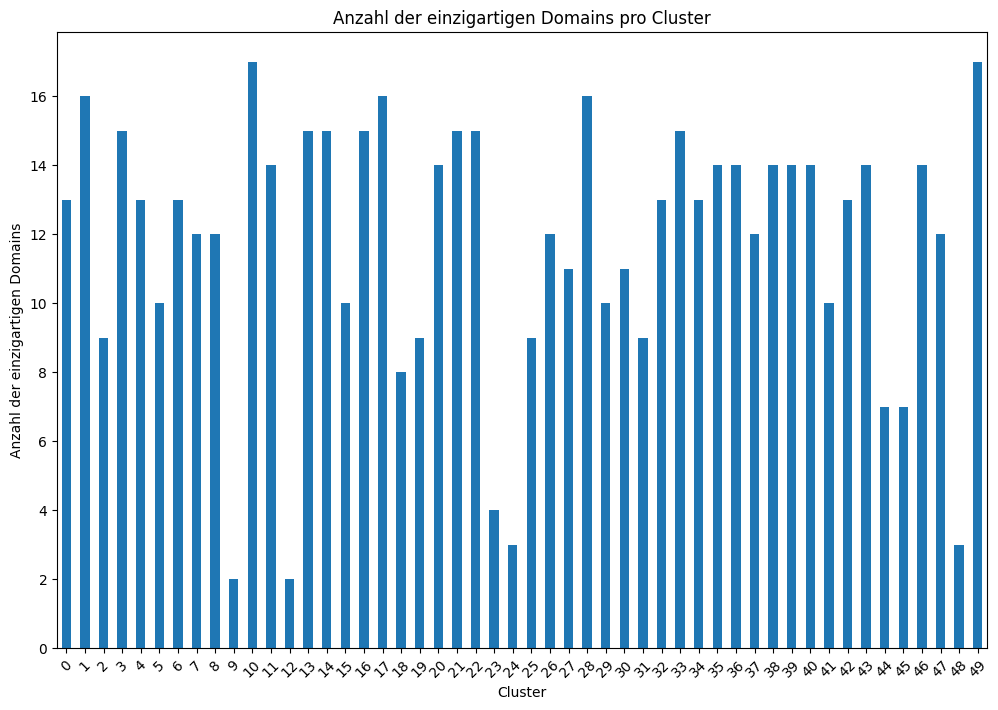

In [ ]:
# Erstellen eines Balkendiagramms mit einer größeren Figur
plt.figure(figsize=(12, 8))  # Sie können diese Werte anpassen, um die Größe des Diagramms zu ändern
unique_domains_per_cluster.plot(kind='bar')

plt.xlabel('Cluster')
plt.ylabel('Anzahl der einzigartigen Domains')
plt.title('Anzahl der einzigartigen Domains pro Cluster')

# Drehen der x-Achsen-Beschriftungen, um Überlappungen zu vermeiden
plt.xticks(rotation=45)  # Drehen der Beschriftungen um 45 Grad

plt.show()


In [ ]:
# Count the number of unique values in the 'token_domain' column
number_of_unique_domains = df['token_domain'].nunique()

print("Number of unique domains in 'token_domain':", number_of_unique_domains)


Number of unique domains in 'token_domain': 19


It can be seen that the model is very poorly Clustered, of the 19 available domains, many Clusters contain more than 10 domains, which means that the performance of the model is not good enough.

Accordingly, the glove model for Wordvector must be better trained, as these also have an influence on sentence embedding, because the average values are taken into account here.




# Round 2 (Tuning)

In [ ]:
df_x = pd.read_csv(file_path, sep='\t')
df = df_x.copy()


## Word embedding 2nd Round

In [ ]:
from ast import literal_eval

# Ensure the tokens are in list format
df['token_words_content'] = df['token_words_content'].apply(literal_eval)

# Extract unique words
unique_words = set()
df['token_words_content'].apply(lambda tokens: unique_words.update(tokens))
unique_words = list(unique_words)

In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.decomposition import TruncatedSVD

def create_cooccurrence_matrix(tokenized_corpus, window_size, vocab):
    vocab_size = len(vocab)
    word_to_id = {word: i for i, word in enumerate(vocab)}

    # Initialize co-occurrence matrix
    cooccurrence_matrix = sparse.lil_matrix((vocab_size, vocab_size), dtype=np.float64)

    # Build the co-occurrence matrix
    for tokens in tokenized_corpus:
        for i, word in enumerate(tokens):
            if word in word_to_id:
                word_id = word_to_id[word]
                for j in range(max(i - window_size, 0), min(i + window_size + 1, len(tokens))):
                    if i != j and tokens[j] in word_to_id:
                        context_word_id = word_to_id[tokens[j]]
                        cooccurrence_matrix[word_id, context_word_id] += 1.0
    return cooccurrence_matrix, word_to_id

# Example usage

tokenized_corpus = df['token_words_content'].tolist()  # Assuming this is your tokenized corpus
vocab = list(set(word for tokens in tokenized_corpus for word in tokens))  # Create a vocabulary

# Verwendung
cooccurrence_matrix, word_to_id = create_cooccurrence_matrix(tokenized_corpus, window_size=5, vocab=vocab)


In [ ]:
import numpy as np
from scipy import sparse

def train_glove(cooccurrence_matrix, vector_size, iterations, learning_rate, x_max, alpha):
    # Vektor-Initialisierung
    vocab_size = cooccurrence_matrix.shape[0]
    W = np.random.randn(vocab_size, vector_size) * 0.01
    W_context = np.random.randn(vocab_size, vector_size) * 0.01
    b = np.zeros(vocab_size)
    b_context = np.zeros(vocab_size)

    # Gewichtungsfunktion
    def weight_fn(cooccurrence, x_max, alpha):
        return min(1.0, (cooccurrence / x_max) ** alpha)

    # Trainingsschleife
    for iter in range(iterations):
        for i, j in zip(*cooccurrence_matrix.nonzero()):
            cooccurrence = cooccurrence_matrix[i, j]
            weight = weight_fn(cooccurrence, x_max, alpha)
            common_term = weight * (np.dot(W[i], W_context[j]) + b[i] + b_context[j] - np.log(cooccurrence))
            W_grad = common_term * W_context[j]
            W_context_grad = common_term * W[i]

            # Parameter aktualisieren
            W[i] -= learning_rate * W_grad
            W_context[j] -= learning_rate * W_context_grad
            b[i] -= learning_rate * common_term
            b_context[j] -= learning_rate * common_term

    return W, W_context

# Trainieren Sie das Modell
vector_size = 100  # Dimensionalität der Vektoren
iterations = 5  # Anzahl der Trainingsepochen
learning_rate = 0.05  # Lernrate
x_max = 100  # Parameter für die Gewichtungsfunktion
alpha = 0.75  # Parameter für die Gewichtungsfunktion

# Die Co-Occurrence-Matrix sollte hier bereits definiert sein
W, W_context = train_glove(cooccurrence_matrix, vector_size, iterations, learning_rate, x_max, alpha)


### Cosine Similarity 2nd Round

In [ ]:
from numpy.linalg import norm

def cosine_similarity(vec_a, vec_b):
    """Berechnet die Kosinusähnlichkeit zwischen zwei Vektoren."""
    return np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))


In [ ]:
def word_similarity(word1, word2, word_vectors, word_to_id):
    """Berechnet die Kosinusähnlichkeit zwischen den Vektoren zweier Wörter."""
    # Prüfen, ob beide Wörter im Vokabular sind
    if word1 in word_to_id and word2 in word_to_id:
        vec_word1 = word_vectors[word_to_id[word1]]
        vec_word2 = word_vectors[word_to_id[word2]]
        return cosine_similarity(vec_word1, vec_word2)
    else:
        return "Eines oder beide Wörter nicht im Vokabular."

# Beispiel: Ähnlichkeit zwischen "President" und "Minister"
similarity = word_similarity('president', 'minister', W, word_to_id)
print(f"Die Ähnlichkeit zwischen 'president' und 'minister' ist: {similarity}")


Die Ähnlichkeit zwischen 'president' und 'minister' ist: 0.6323541646120925


Die Ähnlickeiten habe sich verändert, durch die Epochesteigerung im Training

### Testing - Word analogy 2nd Round

In [ ]:
def find_closest_word(vec, word_vectors, word_to_id):
    """Findet das Wort, dessen Vektor am nächsten zum gegebenen Vektor liegt."""
    min_distance = float('inf')
    closest_word = None

    for word, index in word_to_id.items():
        distance = np.linalg.norm(vec - word_vectors[index])
        if distance < min_distance:
            min_distance = distance
            closest_word = word

    return closest_word

def solve_analogy(word_a, word_b, word_c, word_vectors, word_to_id):
    """Löst eine Wortanalogie der Form: word_a ist zu word_b, wie word_c zu ...?"""
    # Prüfen, ob die Wörter im Vokabular sind
    if word_a in word_to_id and word_b in word_to_id and word_c in word_to_id:
        vec_a = word_vectors[word_to_id[word_a]]
        vec_b = word_vectors[word_to_id[word_b]]
        vec_c = word_vectors[word_to_id[word_c]]

        # Vektor-Operation durchführen
        target_vec = vec_b - vec_a + vec_c

        # Das nächstgelegene Wort zu diesem Vektor finden
        closest_word = find_closest_word(target_vec, word_vectors, word_to_id)
        return closest_word
    else:
        return "Eines oder mehrere Wörter nicht im Vokabular."

# Beispiel: Lösen der Analogie "man" zu "king" wie "woman" zu ...
result = solve_analogy('man', 'king', 'woman', W, word_to_id)
print(f"Man ist zu King, wie Woman zu: {result}")


Man ist zu King, wie Woman zu: silva


In [ ]:
def solve_analogy(word_a, word_b, word_c, W, W_context, word_to_id):
    """Löst eine Wortanalogie der Form: word_a ist zu word_b, wie word_c zu ...?"""
    # Prüfen, ob die Wörter im Vokabular sind
    if word_a in word_to_id and word_b in word_to_id and word_c in word_to_id:
        # Durchschnitt der Haupt- und Kontextvektoren für jedes Wort berechnen
        vec_a = (W[word_to_id[word_a]] + W_context[word_to_id[word_a]]) / 2
        vec_b = (W[word_to_id[word_b]] + W_context[word_to_id[word_b]]) / 2
        vec_c = (W[word_to_id[word_c]] + W_context[word_to_id[word_c]]) / 2

        # Vektor-Operation durchführen
        target_vec = vec_b - vec_a + vec_c

        # Das nächstgelegene Wort zu diesem Vektor finden
        closest_word = find_closest_word(target_vec, (W + W_context) / 2, word_to_id)
        return closest_word
    else:
        return "Eines oder mehrere Wörter nicht im Vokabular."

# Beispiel
result = solve_analogy('man', 'king', 'woman', W, W_context, word_to_id)
print(f"Man ist zu King, wie Woman zu: {result}")


Man ist zu King, wie Woman zu: delft


At least you can see a slight improvement compared to the previous model, there are now names.

## Sentence embedding 2nd Round

In [ ]:
# Averaging word vectors
word_vectors = (W + W_context) / 2


In [ ]:
# Calculation of the sentence embeddings
def sentence_embedding(tokenized_sentence, word_vectors, word_to_id):
    embeddings = [word_vectors[word_to_id[word]] for word in tokenized_sentence if word in word_to_id]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word_vectors.shape[1])  # Nullvektor für Sätze ohne Wörter im Vokabular

# Berechnung der Satz-Embeddings für jeden Satz in Ihrem DataFrame
df['sentence_embeddings'] = df['token_sents_content'].apply(
    lambda x: sentence_embedding(x, word_vectors, word_to_id))


In [ ]:
from numpy.linalg import norm

def cosine_similarity(vec_a, vec_b):
    """Berechnet die Kosinusähnlichkeit zwischen zwei Vektoren."""
    return np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))

In [ ]:
# Beispiel: wei Sätze aus meinem DataFrame
sentence_embedding_1 = df['sentence_embeddings'].iloc[4]  # Embedding des ersten Satzes
sentence_embedding_2 = df['sentence_embeddings'].iloc[130]  # Embedding des zweiten Satzes

# Berechnen der Kosinusähnlichkeit zwischen diesen beiden Sätzen
similarity = cosine_similarity(sentence_embedding_1, sentence_embedding_2)
print(f"Die Kosinusähnlichkeit zwischen den beiden Sätzen ist: {similarity}")


Die Kosinusähnlichkeit zwischen den beiden Sätzen ist: 0.9996565023070247


### Cluster Sentences Embedding 2nd Round

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Konvertieren Sie die Satz-Embeddings in eine Matrix
embeddings_matrix = np.vstack(df['sentence_embeddings'].values)


In [ ]:
# Anzahl der Cluster festlegen
n_clusters = 50  # Beispielwert, anpassen an Ihre Bedürfnisse

# K-Means Clustering durchführen
kmeans = KMeans(n_clusters=n_clusters)
df['cluster'] = kmeans.fit_predict(embeddings_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Anzeigen einiger Sätze aus jedem Cluster
for cluster in range(n_clusters):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['token_domain'].head(10))  # Zeigt die ersten 5 Sätze des Clusters an
    print("\n")

Cluster 0:
348      ['energyvoice']
495      ['energyvoice']
541      ['energyvoice']
607      ['energyvoice']
696      ['energyvoice']
1046     ['energyvoice']
1221     ['energyvoice']
1260       ['eurosolar']
2805    ['azocleantech']
2827    ['azocleantech']
Name: token_domain, dtype: object


Cluster 1:
63     ['energyintel']
88     ['energyintel']
123    ['energyintel']
200    ['energyintel']
214    ['energyintel']
248    ['energyvoice']
284    ['energyvoice']
298    ['energyvoice']
312    ['energyvoice']
316    ['energyvoice']
Name: token_domain, dtype: object


Cluster 2:
9      ['energyintel']
27     ['energyintel']
72     ['energyintel']
128    ['energyintel']
162    ['energyintel']
229    ['energyintel']
253    ['energyvoice']
255    ['energyvoice']
259    ['energyvoice']
263    ['energyvoice']
Name: token_domain, dtype: object


Cluster 3:
84     ['energyintel']
101    ['energyintel']
104    ['energyintel']
118    ['energyintel']
314    ['energyvoice']
353    ['energyvoice']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Angenommen, df ist Ihr DataFrame und 'cluster' ist die Spalte, die die Clusterzuordnung enthält
# und 'token_domain' ist die Spalte mit den Domain-Namen

# Berechnen der Anzahl der einzigartigen Domains pro Cluster
unique_domains_per_cluster = df.groupby('cluster')['token_domain'].nunique()


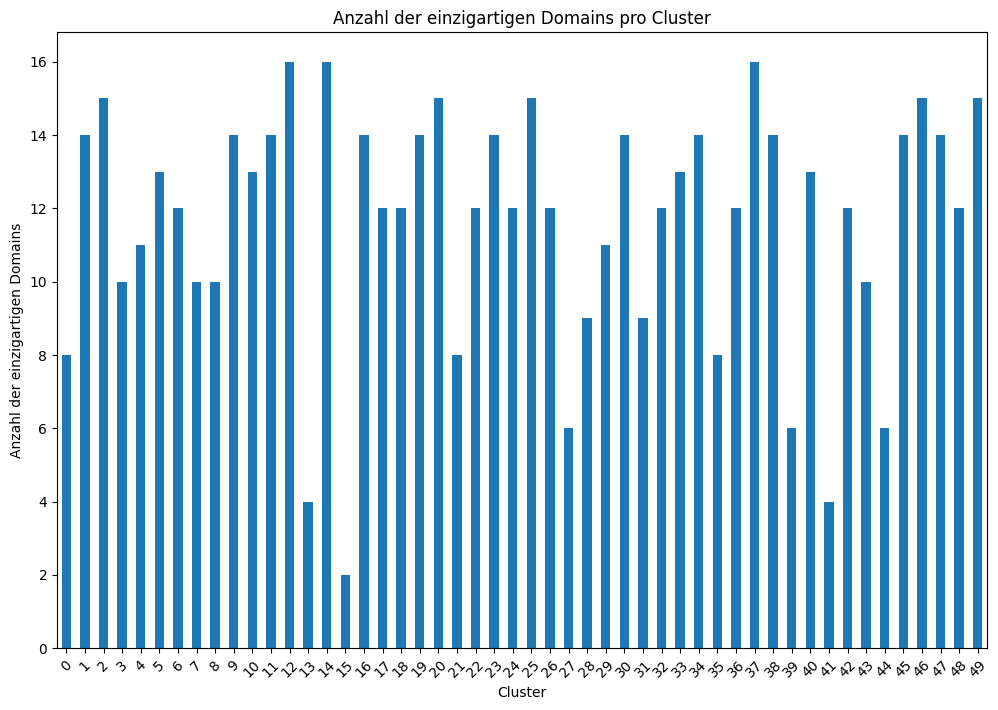

In [ ]:
# Erstellen eines Balkendiagramms mit einer größeren Figur
plt.figure(figsize=(12, 8))  # Sie können diese Werte anpassen, um die Größe des Diagramms zu ändern
unique_domains_per_cluster.plot(kind='bar')

plt.xlabel('Cluster')
plt.ylabel('Anzahl der einzigartigen Domains')
plt.title('Anzahl der einzigartigen Domains pro Cluster')

# Drehen der x-Achsen-Beschriftungen, um Überlappungen zu vermeiden
plt.xticks(rotation=45)  # Drehen der Beschriftungen um 45 Grad

plt.show()

In [ ]:
# Count the number of unique values in the 'token_domain' column
number_of_unique_domains = df['token_domain'].nunique()

print("Number of unique domains in 'token_domain':", number_of_unique_domains)


Number of unique domains in 'token_domain': 19


# Using Pre-trained model (GloVe)

In [ ]:
# Step 1: Download GloVe Pre-trained Word Vectors
# You can download GloVe vectors from the official site and upload them to Colab,
# or you can use the following command to directly download a specific version (e.g., GloVe.6B.100d) in Colab:

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

# Step 2: Define a Function to Load GloVe Vectors
def load_glove_model(glove_file):
    print("Loading Glove Model")
    with open(glove_file, 'r') as file:
        model = {}
        for line in file:
            split_line = line.split()
            word = split_line[0]
            embedding = [float(val) for val in split_line[1:]]
            model[word] = embedding
        print(f"Done. {len(model)} words loaded!")
    return model

# Step 3: Load the GloVe Vectors
glove_model = load_glove_model('glove.6B.100d.txt')

# Now you can use `glove_model` in your application.
# For example, to get the vector for a word:
vector = glove_model.get('computer', None)

--2023-12-14 18:23:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-12-14 18:23:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-14 18:23:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

## Cosine Similiarity with Pre-trained GloVE

In [ ]:
import numpy as np
from numpy.linalg import norm

# Function to calculate cosine similarity
def cosine_similarity(vec_a, vec_b):
    return np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))

# Example words
word1 = 'king'
word2 = 'queen'

# Get vectors for the words
vec_word1 = glove_model.get(word1)
vec_word2 = glove_model.get(word2)

# Calculate cosine similarity
if vec_word1 is not None and vec_word2 is not None:
    similarity = cosine_similarity(vec_word1, vec_word2)
    print(f"Cosine similarity between '{word1}' and '{word2}' is: {similarity}")
else:
    print("Word not found in GloVe vectors.")

Cosine similarity between 'king' and 'queen' is: 0.7507690793623848


In [ ]:
import numpy as np
from numpy.linalg import norm

# Function to calculate cosine similarity
def cosine_similarity(vec_a, vec_b):
    return np.dot(vec_a, vec_b) / (norm(vec_a) * norm(vec_b))

# Example words
word1 = 'president'
word2 = 'minister'

# Get vectors for the words
vec_word1 = glove_model.get(word1)
vec_word2 = glove_model.get(word2)

# Calculate cosine similarity
if vec_word1 is not None and vec_word2 is not None:
    similarity = cosine_similarity(vec_word1, vec_word2)
    print(f"Cosine similarity between '{word1}' and '{word2}' is: {similarity}")
else:
    print("Word not found in GloVe vectors.")

Cosine similarity between 'president' and 'minister' is: 0.6236839725819695


The values are similar for the pre-trained model and the in-house model from the second round.

## Word analogy with pre-trained model

In [ ]:
import numpy as np

def solve_analogy(word_a, word_b, word_c, glove_model):
    """
    Solves analogies of the form: word_a is to word_b as word_c is to ?
    For example: man is to king as woman is to ?
    """
    # Get vectors for each word
    vec_a, vec_b, vec_c = glove_model.get(word_a), glove_model.get(word_b), glove_model.get(word_c)

    # Return None if any word is not in the vocabulary
    if vec_a is None or vec_b is None or vec_c is None:
        return None

    # Find the word whose vector is closest to vec_b - vec_a + vec_c
    analogy_vector = np.subtract(np.add(vec_b, vec_c), vec_a)
    closest_word = None
    max_similarity = -np.inf

    for word in glove_model.keys():
        if word not in [word_a, word_b, word_c]:
            similarity = np.dot(glove_model[word], analogy_vector) / (np.linalg.norm(glove_model[word]) * np.linalg.norm(analogy_vector))
            if similarity > max_similarity:
                max_similarity = similarity
                closest_word = word

    return closest_word




In [ ]:
# Example usage
result = solve_analogy('man', 'king', 'woman', glove_model)
print("Man is to king as woman is to:", result)


Man is to king as woman is to: queen


In [ ]:
# Example usage
result = solve_analogy('man', 'penis', 'woman', glove_model)
print("Man have a penis and woman have:", result)

Man have a penis and woman have: clitoris


Here you can clearly see that the model is giving out the expected word.

# Using Pre-trained model (GPT-2.0) for classification of domain

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification, Trainer, TrainingArguments
import torch

In [ ]:
# Laden Ihres DataFrames (ersetzen Sie dies durch Ihren eigenen Datenladeprozess)
df_x = pd.read_csv(file_path, sep='\t')
df = df_x.copy()

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['token_domain'])

# Angenommen, 'text' ist die Spalte mit dem Text und 'domain' ist Ihre Zielvariable
train_texts, val_texts, train_labels, val_labels = train_test_split(df['content'], labels, test_size=.2)


In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Setzen des Padding-Tokens
tokenizer.pad_token = tokenizer.eos_token

# Tokenisierung der Trainings- und Validierungsdaten
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True)

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Stellen Sie sicher, dass die Labels als Integer vorliegen
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_labels)
val_dataset = CustomDataset(val_encodings, val_labels)







In [ ]:
#!pip install transformers[torch]

from transformers import GPT2ForSequenceClassification, Trainer, TrainingArguments

# Modell initialisieren
model = GPT2ForSequenceClassification.from_pretrained('gpt2', num_labels=19)

# Festlegen der PAD-Token-ID für das Modell
model.config.pad_token_id = tokenizer.pad_token_id

# Trainingseinstellungen definieren
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

# Trainer initialisieren
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Training starten
trainer.train()


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,1.880800
1000,0.583200
1500,0.426100
2000,0.366200
2500,0.228500
3000,0.212300
3500,0.145400
4000,0.114500
4500,0.059900
5000,0.080700


TrainOutput(global_step=5766, training_loss=0.3635193516800398, metrics={'train_runtime': 1915.0951, 'train_samples_per_second': 12.039, 'train_steps_per_second': 3.011, 'total_flos': 1.205024255115264e+16, 'train_loss': 0.3635193516800398, 'epoch': 3.0})

In [ ]:
model.save_pretrained("mein_gpt2_modell")
tokenizer.save_pretrained("mein_gpt2_modell")


('mein_gpt2_modell/tokenizer_config.json',
 'mein_gpt2_modell/special_tokens_map.json',
 'mein_gpt2_modell/vocab.json',
 'mein_gpt2_modell/merges.txt',
 'mein_gpt2_modell/added_tokens.json')

In [ ]:
# Vorhersagen auf dem Validierungsset
predictions = trainer.predict(val_dataset)

# Konvertieren der Vorhersagen in tatsächliche Label-Indizes
predicted_labels = np.argmax(predictions.predictions, axis=-1)


In [ ]:
from sklearn.metrics import classification_report
# Annahme: `predicted_labels` und `val_labels` sind Ihre Vorhersagen bzw. tatsächlichen Labels
unique_labels = np.unique(np.concatenate([predicted_labels, val_labels]))
target_names = [label_encoder.classes_[i] for i in unique_labels]

print(classification_report(val_labels, predicted_labels, labels=unique_labels, target_names=target_names))


                           precision    recall  f1-score   support

         ['azocleantech']       1.00      1.00      1.00       325
        ['businessgreen']       0.81      0.96      0.88        27
        ['cleantechnica']       0.97      0.98      0.97       363
            ['decarbxpo']       1.00      1.00      1.00         5
            ['ecofriend']       1.00      0.80      0.89        10
          ['energyintel']       0.91      0.86      0.89        37
          ['energyvoice']       0.89      0.93      0.91       191
            ['eurosolar']       1.00      0.67      0.80         3
         ['greenprophet']       0.91      0.77      0.83        13
      ['naturalgasintel']       1.00      1.00      1.00       145
           ['pvmagazine']       0.99      0.97      0.98       233
               ['pvtech']       0.72      0.89      0.80        38
         ['rechargenews']       0.97      0.91      0.94       127
     ['solarindustrymag']       0.99      0.99      0.99     

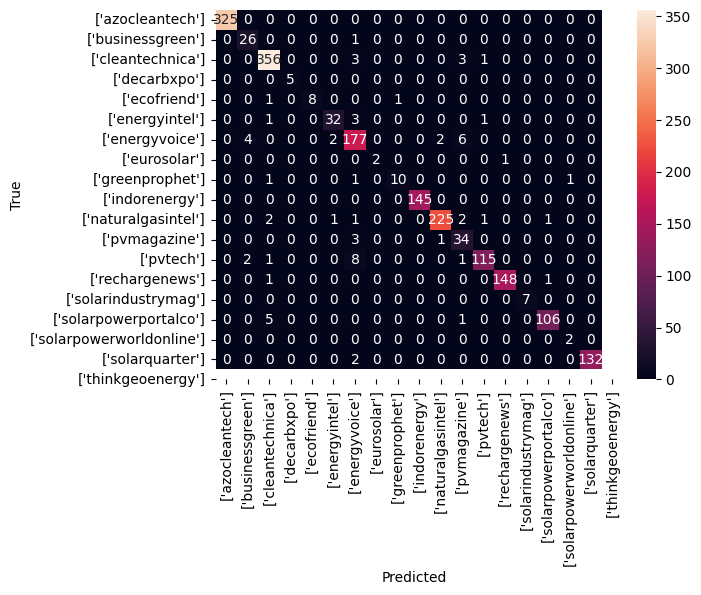

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In classification, it can be seen that the pre-trained model of GPT-2 is almost error-free, when compared with the results of sentence embedding of in-house model, GPT2 is much better. One of the reasons why the in-house model looks bad is that average values of word vectors have been used. This has changed the context vectors to make better decisions. This is why the in-house model performs very poorly in clustering.